In [1]:
from astropy.io import ascii

In [2]:
evn = ascii.read("/home/tony/Desktop/SouthAfrica/SourceLists/EVNlist2.csv")
evn

IAUname,Alias1,Alias2,redshift,Q/B/G,RA2000,Dec2000,fromfile
str8,str11,str8,int64,str2,str12,str12,str8
0004+139,--,--,--,Q,00:06:57.681,14:15:53.90,EVN_list
0008+106,IIIZw2,--,--,G,00:10:34.282,10:58:41.40,EVN_list
0008+260,--,--,--,--,00:10:35.948,26:18:16.73,EVN_list
0010+405,--,--,--,Q,00:13:31.170,40:51:36.95,EVN_list
0010+775,--,--,--,--,00:13:11.752,77:48:46.30,EVN_list
0014+813,--,--,--,Q,00:17:08.475,81:35:08.29,EVN_list
0016+731,--,--,--,Q,00:19:45.792,73:27:30.19,EVN_list
0017+257,4C25.01,--,--,Q,00:19:39.776,26:02:52.43,EVN_list
0018+729,--,--,--,--,00:21:27.376,73:12:42.04,EVN_list


In [3]:
evn.colnames

['IAUname',
 'Alias1',
 'Alias2',
 'redshift',
 'Q/B/G',
 'RA2000',
 'Dec2000',
 'fromfile']

In [4]:
import astropy.coordinates as coord
import astropy.units as u

first_row = evn[1] # get the first (0th) row
ra = coord.Angle(first_row["RA2000"], unit=u.hour) # create an Angle object
ra.degree # convert to degrees

2.642841666666666

In [5]:
r1=evn['RA2000']
ra = coord.Angle(r1, unit=u.hour)
ra = ra.wrap_at(180*u.degree)
d1=evn['Dec2000']
dec = coord.Angle(d1, unit=u.degree)
print evn['Dec2000'],dec.degree,ra.degree

  Dec2000   
------------
 14:15:53.90
 10:58:41.40
 26:18:16.73
 40:51:36.95
 77:48:46.30
 81:35:08.29
 73:27:30.19
 26:02:52.43
 73:12:42.04
  0:14:56.26
         ...
 39:05:58.81
 45:53:04.40
 49:50:09.30
 -0:19:47.61
 28:37:59.50
 49:50:08.43
 27:11:40.77
 81:52:52.42
 51:23:16.85
-21:12:22.72
 39:22:28.46
Length = 1194 rows [ 14.26497222  10.97816667  26.30464722 ...,  51.38801389 -21.20631111
  39.37457222] [ 1.7403375   2.64284167  2.64978333 ..., -0.39851667 -0.6033875  -0.250625  ]


Populating the interactive namespace from numpy and matplotlib


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/pymodules/python2.7/matplotlib/cbook.py:1711: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = np.zeros(new_shape, a.dtype)
/usr/lib/pymodules/python2.7/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


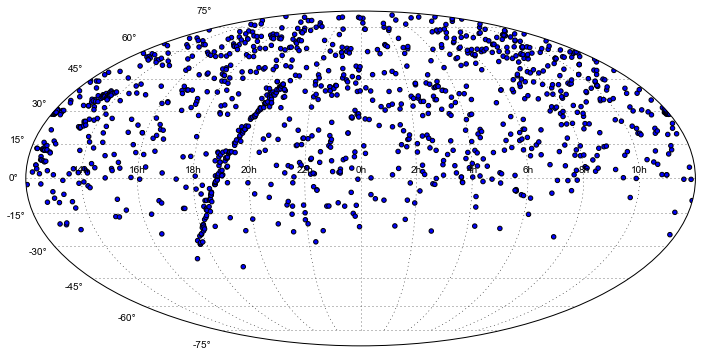

In [6]:
import matplotlib.pyplot as plt
%pylab inline
pylab.figure(figsize=(12,6))
ax = plt.subplot(111, projection="mollweide")
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
ax.scatter(ra.radian, dec.radian)
#Amp=np.radians(117.4) # tilt of galactic plane to ecliptic is 62.6deg
#Origin=np.radians(282.25) # when b=0 and d=0
#x=np.arange(-np.pi,np.pi,0.01)
#ax.plot(x,np.arctan(Amp*np.sin(x-Origin)))

In [7]:
xrq = ascii.read("/home/tony/Desktop/SouthAfrica/SourceLists/Xray_Quasars.csv")
xrq

IAUname,Alias1,Alias2,redshift,Q/B/G,RA2000,Dec2000,fromfile,LAS,Xrayref
str8,str14,int64,float64,str1,int64,int64,str11,str3,str4
0007+171,0007+171,--,1.601,Q,--,--,Xray quasar,--,l
0017+154,3C9,--,2.012,Q,--,--,Xray quasar,--,H
0056-001,4C-00.06,--,0.72,Q,--,--,Xray quasar,--,l
0106+013,4C01.02,--,2.107,Q,--,--,Xray quasar,--,o k
0109+176,4C17.09,--,2.157,Q,--,--,Xray quasar,14,k
0112-017,PKS0112-017,--,1.365,Q,--,--,Xray quasar,--,z
0119+041,PKS0119+041,--,0.637,Q,--,--,Xray quasar,--,o
0133+207,3C47,--,0.425,Q,--,--,Xray quasar,70,z
0134+329,3C48,--,0.367,Q,--,--,Xray quasar,--,H


In [8]:
xrq.sort(['redshift'])

In [9]:
xrq

IAUname,Alias1,Alias2,redshift,Q/B/G,RA2000,Dec2000,fromfile,LAS,Xrayref
str8,str14,int64,float64,str1,int64,int64,str11,str3,str4
2251-178,MR2251-178,--,0.068,Q,--,--,Xray quasar,--,k -H
0732-008,0732-008,--,0.128,Q,--,--,Xray quasar,--,h -H
1635+119,MC2_1635+119,--,0.146,Q,--,--,Xray quasar,--,z
1226+023,3C273,--,0.158,Q,--,--,Xray quasar,--,z
1028+313,B2_1028+313,--,0.177,Q,--,--,Xray quasar,--,z
0736+017,PKS0736+017,--,0.191,Q,--,--,Xray quasar,--,k
2135-147,PKS2135-147,--,0.2,Q,--,--,Xray quasar,150,z
2141+175,OX169,--,0.213,Q,--,--,Xray quasar,--,z
0312-770,PKS0312-770,--,0.223,Q,--,--,Xray quasar,--,z -H


In [10]:
wp = ascii.read("/home/tony/Desktop/SouthAfrica/SourceLists/Wall+Peacock2JyNew.csv")
wp
wp['Name']

FBQS J0006-0004
PKS 0008-42
PKS 0022-423
PKS 0023-26
3C 015
3C 017
3C 018
PKS 0039-44
3C 020
LCRS B004355.8-422414
NGC 0253


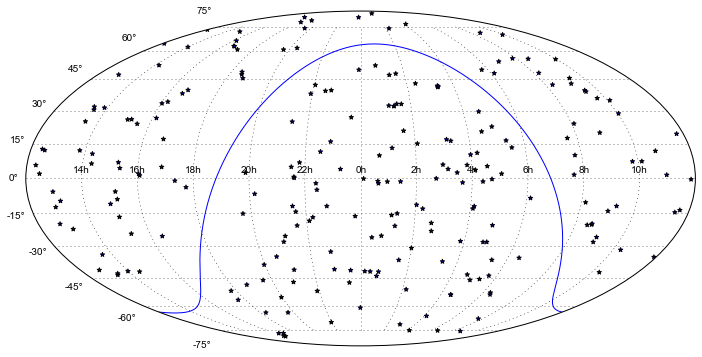

In [11]:
r1=wp['RA2000']
ra = coord.Angle(r1, unit=u.hour)
ra = ra.wrap_at(180*u.degree)
d1=wp['Dec2000']
names=wp['Name']
dec = coord.Angle(d1, unit=u.degree)
#print evn['Dec2000'],dec.degree,ra.degree
pylab.figure(figsize=(12,6))
ax = plt.subplot(111, projection="mollweide")
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
Amp=np.radians(117.4) # tilt of galactic plane to ecliptic is 62.6deg
Origin=np.radians(282.25) # when b=0 and d=0
x=np.arange(-np.pi,np.pi,0.01)
ax.plot(x,np.arctan(Amp*np.sin(x-Origin)))
ax.scatter(ra.radian, dec.radian,marker="*")
#ax.text(ra,dec,n)

In [12]:
plt.savefig("map.pdf")